# Task 6 : Fraud Transaction Detection

In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [3]:
df = pd.read_csv('/content/creditcard.csv')

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [6]:
df['Class'].value_counts()

0.0    17836
1.0       81
Name: Class, dtype: int64

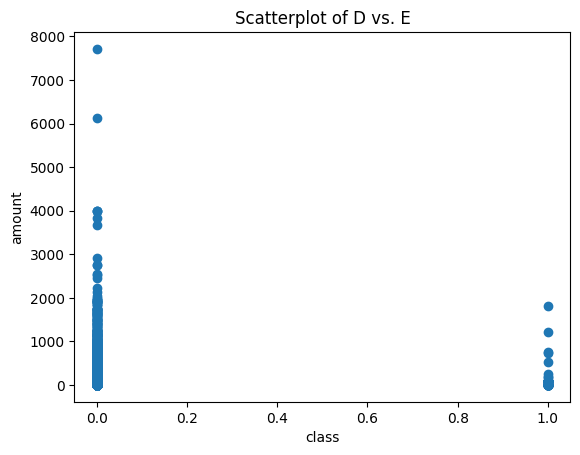

In [7]:
import matplotlib.pyplot as plt


plt.scatter(x = df['Class'] , y = df['Amount'] )
plt.xlabel('class')  # x-axis label
plt.ylabel('amount')  # y-axis label
plt.title('Scatterplot of D vs. E')  # title of the plot
plt.show()

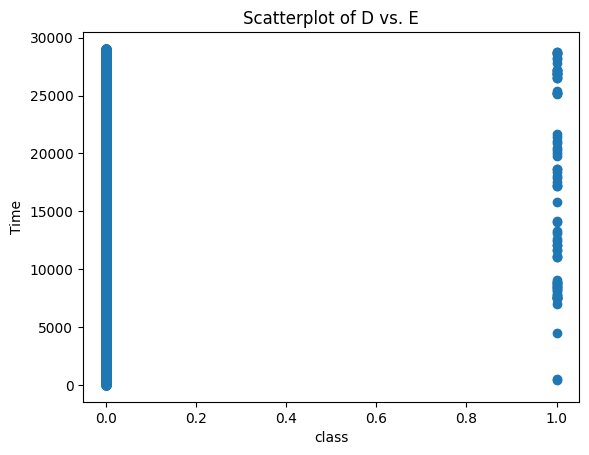

In [8]:
plt.scatter(x = df['Class'] , y = df['Time'] )
plt.xlabel('class')  # x-axis label
plt.ylabel('Time')  # y-axis label
plt.title('Scatterplot of D vs. E')  # title of the plot
plt.show()

<Axes: >

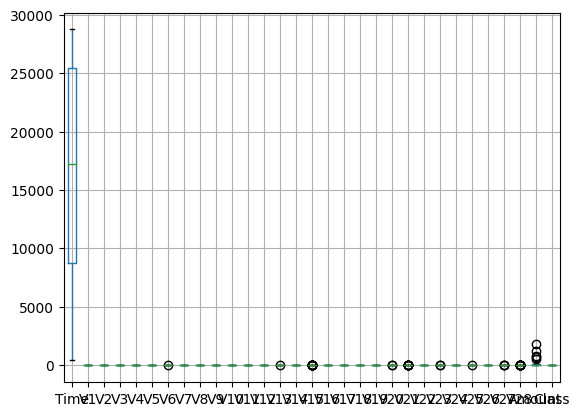

In [9]:
df[df['Class']==1].boxplot()

<Axes: >

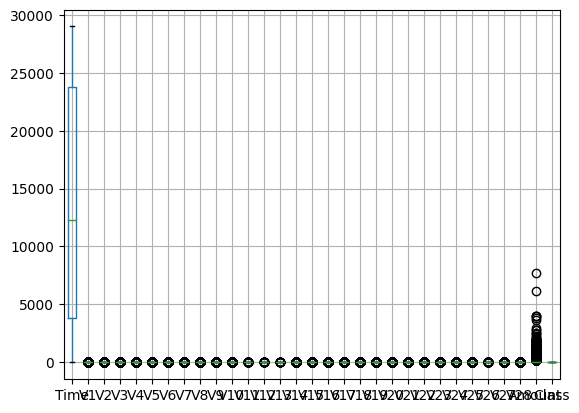

In [10]:
df[df['Class']==0].boxplot()

In [11]:
# Separate the majority and minority class
non_fraud = df[df['Class'] == 0]
fraud = df[df['Class'] == 1]

# Undersample the majority class
undersampled_non_fraud = non_fraud.sample(n=30*len(fraud), random_state=42)

# Concatenate the undersampled majority class with the minority class
df_balanced = pd.concat([undersampled_non_fraud, fraud])

# Shuffle the balanced dataset
df_balanced = df_balanced.sample(frac=1, random_state=42)

# Check the class distribution in the balanced dataset
class_counts = df_balanced['Class'].value_counts()
print(class_counts)

# to balance the dataset , amount is taken less than 2000 as much of fraud is taking place around this region.
df_curated = df_balanced[df_balanced['Amount'] < 2000]

0.0    2430
1.0      81
Name: Class, dtype: int64


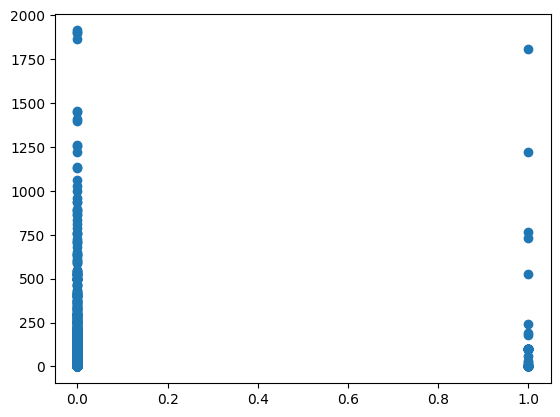

In [12]:
plt.scatter( x= df_curated['Class'] , y = df_curated['Amount'])

In [13]:
df_curated.shape

(2508, 31)

In [14]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score
import tensorflow as tf


# Split the dataset into features (X) and target variable (y)
X = df_curated.drop(columns=['Class']).values
y = df_curated['Class'].values

# Perform feature scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Initialize lists to store training and testing metrics
train_accuracies = []
test_accuracies = []
train_precisions = []
test_precisions = []
train_recalls = []
test_recalls = []
train_losses = []
test_losses = []

# Perform k-fold cross-validation
kfold = KFold(n_splits=5, shuffle=True)
for train_index, test_index in kfold.split(X):
    # Split the data into training and testing sets for the current fold
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Build your TensorFlow model
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(64, activation='relu', input_shape=(30,)),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Train the model
    model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)

    # Evaluate the model on the training and testing sets
    train_loss, train_accuracy = model.evaluate(X_train, y_train, verbose=0)
    test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)

    # Make predictions
    train_probabilities = model.predict(X_train)
    test_probabilities = model.predict(X_test)

    # Convert probabilities to class labels
    train_predictions = np.round(train_probabilities).flatten()
    test_predictions = np.round(test_probabilities).flatten()

    # Calculate metrics
    train_precision = precision_score(y_train, train_predictions)
    test_precision = precision_score(y_test, test_predictions)
    train_recall = recall_score(y_train, train_predictions)
    test_recall = recall_score(y_test, test_predictions)

    # Store the metrics
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)
    train_precisions.append(train_precision)
    test_precisions.append(test_precision)
    train_recalls.append(train_recall)
    test_recalls.append(test_recall)
    train_losses.append(train_loss)
    test_losses.append(test_loss)

# Print the average training and testing metrics
print("Average Training Accuracy:", np.mean(train_accuracies))
print("Average Testing Accuracy:", np.mean(test_accuracies))
print("Average Training Precision:", np.mean(train_precisions))
print("Average Testing Precision:", np.mean(test_precisions))
print("Average Training Recall:", np.mean(train_recalls))
print("Average Testing Recall:", np.mean(test_recalls))
print("Average Training Loss:", np.mean(train_losses))
print("Average Testing Loss:", np.mean(test_losses))

16/16 [==============================] - 0s 1ms/step
Average Training Accuracy: 0.9966108679771424
Average Testing Accuracy: 0.9940199375152587
Average Training Precision: 0.9738776046358014
Average Testing Precision: 0.9728070175438596
Average Training Recall: 0.9197451081882028
Average Testing Recall: 0.8363606981254039
Average Training Loss: 0.014732735604047776
Average Testing Loss: 0.02692772336304188
